In [3]:
import osmnx as ox
road = ox.graph_from_address("Housing Board Colony,Anantapur, Andhra Pradesh India",network_type = "drive")

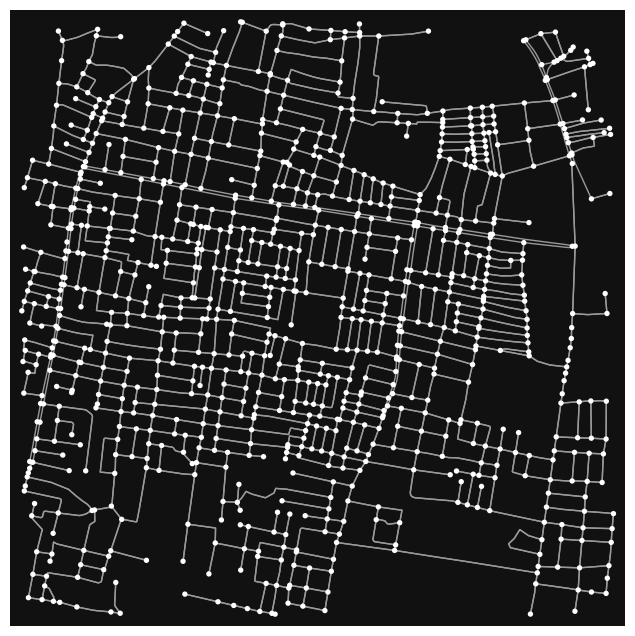

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(road)

In [6]:
for u, v, data in road.edges(data=True):
    print(f"Edge ({u}, {v}): {' '.join(f'{key}={value}' for key, value in data.items())}")


Edge (1156371269, 7791517464): osmid=123383630 highway=unclassified oneway=False reversed=False length=9.586
Edge (1156371269, 2839038211): osmid=100019106 highway=tertiary oneway=False reversed=False length=227.78799999999998 geometry=LINESTRING (77.6119566 14.6640695, 77.6119473 14.6638296, 77.611877 14.6620224)
Edge (1156371269, 7791517414): osmid=100019106 highway=tertiary oneway=False reversed=True length=279.034 geometry=LINESTRING (77.6119566 14.6640695, 77.6118526 14.6665268, 77.6118669 14.6665749)
Edge (1156371528, 7791517426): osmid=834663773 oneway=True name=kadiri road highway=trunk reversed=False length=46.041
Edge (1156371528, 7791517432): osmid=834663777 oneway=True highway=tertiary reversed=False length=42.661
Edge (1376130737, 3745490842): osmid=123383641 highway=tertiary oneway=False reversed=False length=21.047
Edge (1376130737, 7786401688): osmid=123383641 highway=tertiary oneway=False reversed=True length=17.907
Edge (1376130737, 7791517469): osmid=834663785 highwa

[<__main__.Node object at 0x000001CBE7CA7B50>, <__main__.Node object at 0x000001CBE910D9D0>]
[1156371269, 2839038211]


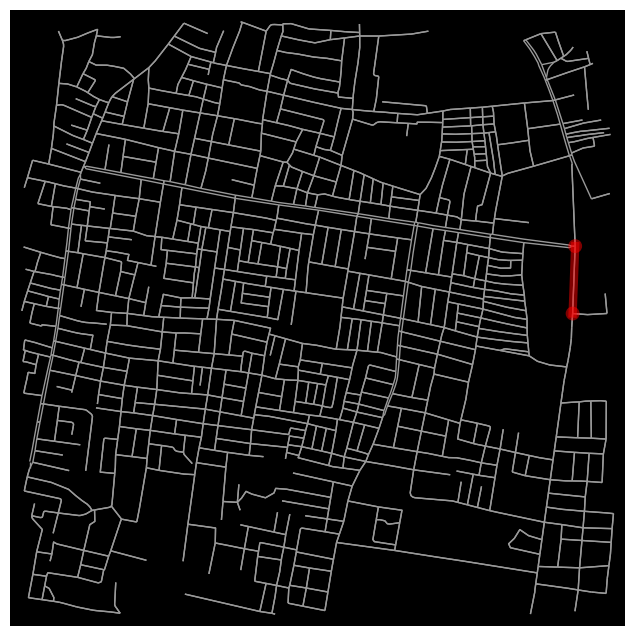

In [54]:
import osmnx as ox

class Node:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x
        self.y = y
        self.neighbours = []

class Graph:
    def __init__(self):
        self.nodes = []

    def create_nodes(self, road):
        for node_id, data in road.nodes(data=True):
            node = Node(node_id, data['x'], data['y'])
            self.nodes.append(node)

    def create_edges(self, road):
        for u, v, data in road.edges(data=True):
            if u != v:
                node_u = self.find_node(u)
                node_v = self.find_node(v)

                if node_u and node_v:
                    node_u.neighbours.append(node_v)
                    node_v.neighbours.append(node_u)

    def find_node(self, value):
        for node in self.nodes:
            if node.id == value:
                return node
        return None
    
    def BFS_path(self, value1, value2):
        start_node = self.find_node(value1)
        end_node = self.find_node(value2)
        paths = [[start_node]]        
        for path in paths:
            for neighbour in path[-1].neighbours:
                if neighbour == end_node:
                    path.append(neighbour)
                    return path
                
                if neighbour not in path:
                    var = path.copy()
                    var.append(neighbour)
                    paths.append(var)

# Example usage
location = "Housing Board Colony, Anantapur, Andhra Pradesh, India"
road = ox.graph_from_address(location, network_type="drive")

g1 = Graph()
g1.create_nodes(road)
g1.create_edges(road)

node_id_1 = 1156371269
node_id_2 =  2839038211

path = g1.BFS_path(node_id_1, node_id_2)
print(path)

temps = []
for i in path:
    temps.append(i.id)
print(temps)

fig, ax = ox.plot_graph_route(road, temps, route_linewidth=6, node_size=0, bgcolor='k', route_color='r')
